In [2]:
%run ./ArenaDataLib.ipynb

In [65]:
# VERSION GROUP 1 - RED, BLUE
# api source: /version-goup/1/

# REGION - KANTO
# api source: /region/1/

# POKEMON GENERATION - i / 1
# hier findet man zb auch die moeglichen moves (165 items)
# api source: /generation/1/

# ARENALEITER: Brock
# https://bulbapedia.bulbagarden.net/wiki/Brock
#brockPokemonTeam = [Pokemon('Geodude', 12, [POKETYPE.Normal, POKETYPE.Normal], [POKETYPE.Rock, POKETYPE.Ground])]
#brockPokemonTeam.append(Pokemon('Onix', 14, [POKETYPE.Normal, POKETYPE.Normal, POKETYPE.Normal], [POKETYPE.Rock, POKETYPE.Ground] ))

# ---- SETTINGS ---- #
ARENA = 'arena-1'
STARTERS = ['bulbasaur','charmander','squirtle']
LOCATIONS =  [{'name':'kanto-route-1', 'steps':31},
              {'name':'kanto-route-2', 'steps':0},
              {'name':'viridian-forest', 'steps':110}] 
GAME = 'blue'
GENERATION = 'red-blue'
#leader
_geodude = {'name': 'geodude', 'level': 12, 'moves':['tackle','defense-curl']}
_onix = {'name': 'onix', 'level': 14, 'moves':['tackle','screech','bide']}
LEADER = ('brock', [_geodude,_onix])
# ----- #

In [68]:
import pathlib
path = pathlib.Path().resolve().as_posix()
pathToSaveCSV = f"{path}/data/{ARENA}"
pathToSaveCSV

'/Users/neekh/htw/wise21/ds/catchEmAll/data/arena-1'

In [4]:
arena1Data =  gatherDataForArena(LOCATIONS,GAME,GENERATION,STARTERS,LEADER)

In [5]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)


In [6]:
for area in arena1Data['areas']:
    print(area)

<Area:
kanto-route-1-area,
 steps:31,
 baseEncounterChance:0.2,
 averageEncounters:6.2,
 encounterablePokemons:[('pidgey', 50, 3.1), ('rattata', 50, 3.1)],
>
<Area:
kanto-route-2-south-towards-viridian-city,
 steps:0,
 baseEncounterChance:0.2,
 averageEncounters:0.0,
 encounterablePokemons:[('caterpie', 15, 0.0), ('pidgey', 45, 0.0), ('rattata', 40, 0.0)],
>
<Area:
viridian-forest-area,
 steps:110,
 baseEncounterChance:0.2,
 averageEncounters:22.0,
 encounterablePokemons:[('caterpie', 45, 9.9), ('metapod', 40, 8.8), ('weedle', 5, 1.1), ('kakuna', 5, 1.1), ('pikachu', 5, 1.1)],
>


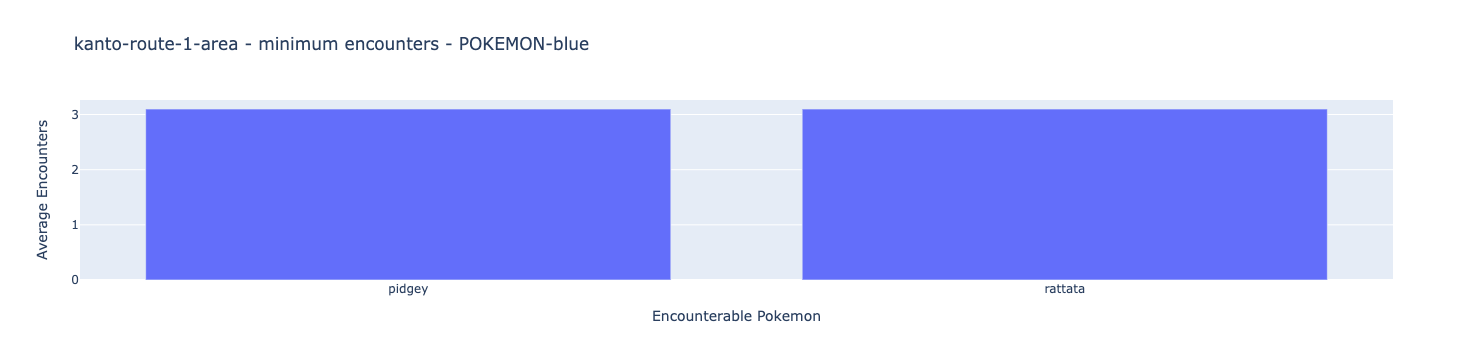

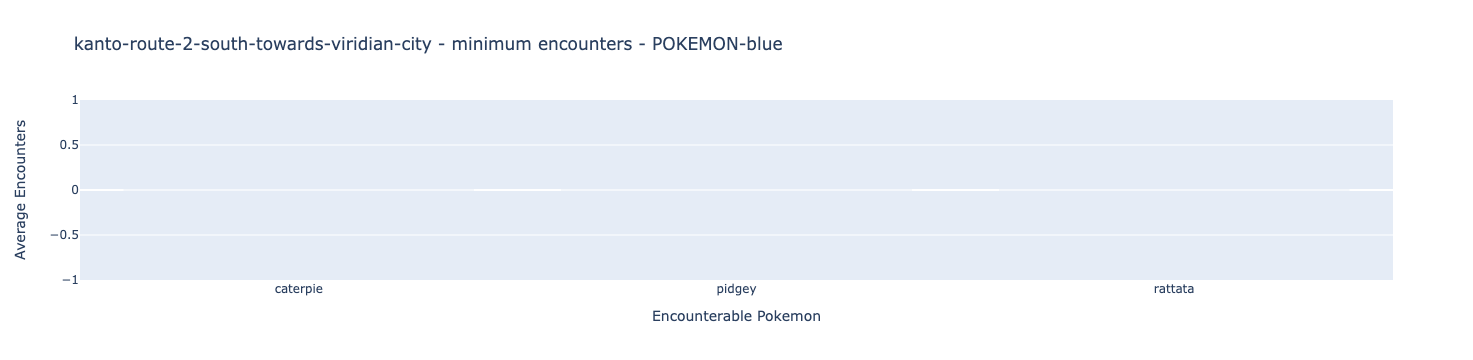

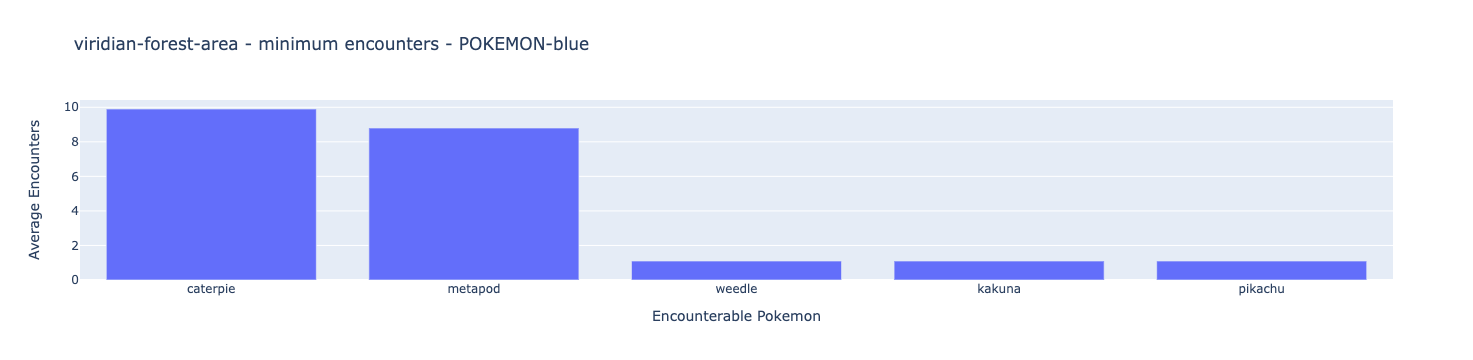

In [7]:
import plotly.graph_objects as go


for area in arena1Data['areas']:
    areaPokemonAverageEncounters = []
    pokemonName = []
    for poke in area.encounterablePokemons:
        areaPokemonAverageEncounters.append(poke[2])
        pokemonName.append(poke[0])
    fig = go.Figure(data=go.Bar(y=areaPokemonAverageEncounters,x=pokemonName))
    fig.update_xaxes(title_text="Encounterable Pokemon")
    fig.update_yaxes(title_text="Average Encounters")
    fig.update_layout(title=f'{area.name} - minimum encounters - POKEMON-{GAME}')
    fig.show()

In [8]:
arena1Data

{'areas': [<__main__.Area at 0x7fa560c32520>,
 'catchablePokemons': {'pidgey': <__main__.Pokemon at 0x7fa560f23eb0>,
  'rattata': <__main__.Pokemon at 0x7fa560e2b760>,
  'caterpie': <__main__.Pokemon at 0x7fa560e2b610>,
  'metapod': <__main__.Pokemon at 0x7fa560f23af0>,
  'weedle': <__main__.Pokemon at 0x7fa560f2b310>,
  'kakuna': <__main__.Pokemon at 0x7fa560f23940>,
  'pikachu': <__main__.Pokemon at 0x7fa560f2b070>,
  'bulbasaur': <__main__.Pokemon at 0x7fa560f238e0>,
  'charmander': <__main__.Pokemon at 0x7fa560f2bd00>,
  'squirtle': <__main__.Pokemon at 0x7fa560f2ba90>},
 'arenaLeader': <__main__.ArenaLeader at 0x7fa560e6fe50>}

In [9]:
dfArea = arena1Data['areas'][0].returnDataFrameReady()
df = pd.DataFrame([dfArea[0]], columns = dfArea[1])
df

name  baseEncounterChance  minimumSteps  averageEncounters  \
0  kanto-route-1-area                  0.2            31                6.2   

                     encounterablePokemons  
0  [(pidgey, 50, 3.1), (rattata, 50, 3.1)]

In [10]:
dfLeader = arena1Data['arenaLeader'].returnDataFrameReady()
df = pd.DataFrame([dfLeader[0]], columns = dfLeader[1])
df

name                                               team  averageLevel
0  brock  [(<Pokemon:\ngeodude,\n moves:[{'name': 'tackl...          13.0

In [11]:
dfPoke = arena1Data['catchablePokemons']['pidgey'].returnDataFrameReady()
df = pd.DataFrame([dfPoke[0]], columns = dfPoke[1])
df['moves'][0]

[({'name': 'gust',
   'moveType': 'flying',
   'damageClass': 'special',
   'power': 40,
   'pp': 35,
   'priority': 0,
   'accuracy': 100},
  1),
 ({'name': 'sand-attack',
   'moveType': 'ground',
   'damageClass': 'status',
   'power': None,
   'pp': 15,
   'priority': 0,
   'accuracy': 100},
  5),
 ({'name': 'quick-attack',
   'moveType': 'normal',
   'damageClass': 'physical',
   'power': 40,
   'pp': 30,
   'priority': 1,
   'accuracy': 100},
  12),
 ({'name': 'whirlwind',
   'moveType': 'normal',
   'damageClass': 'status',
   'power': None,
   'pp': 20,
   'priority': -6,
   'accuracy': None},
  19),
 ({'name': 'wing-attack',
   'moveType': 'flying',
   'damageClass': 'physical',
   'power': 60,
   'pp': 35,
   'priority': 0,
   'accuracy': 100},
  28),
 ({'name': 'agility',
   'moveType': 'psychic',
   'damageClass': 'status',
   'power': None,
   'pp': 30,
   'priority': 0,
   'accuracy': None},
  36),
 ({'name': 'mirror-move',
   'moveType': 'flying',
   'damageClass': 'statu

In [12]:
# EXTRACT AREADATA TO DataFrame

areasData = []
areaDataColumnNames = ['name','steps','averageEncounters','encounterablePokemons']

areas = arena1Data['areas']
for area in areas:
    areaData = [area.name, area.steps, area.averageEncounters, area.encounterablePokemons]
    areasData.append(areaData)
areaTable =  pd.DataFrame(areasData, columns = areaDataColumnNames)
areaTable

name  steps  averageEncounters  \
0                         kanto-route-1-area     31                6.2   
1  kanto-route-2-south-towards-viridian-city      0                0.0   
2                       viridian-forest-area    110               22.0   

                               encounterablePokemons  
0            [(pidgey, 50, 3.1), (rattata, 50, 3.1)]  
1  [(caterpie, 15, 0.0), (pidgey, 45, 0.0), (ratt...  
2  [(caterpie, 45, 9.9), (metapod, 40, 8.8), (wee...

In [75]:
# EXTRACT ENCOUNTERABLEPOKEMON / MyPokemon DataFrame

myPokemons = []
myPokemonColumnNames = ['name', 'moves']

pokemons = arena1Data['catchablePokemons']
for pokemonKey in pokemons:
    pokeValue = pokemons[pokemonKey]
    moves = []
    for move in pokeValue.moves:
        moves.append({'name':move[0]['name'],'levelLearnedAt':move[1]})
    myPokemon = [pokeValue.name, moves]
    myPokemons.append(myPokemon)
myPokemonTable =  pd.DataFrame(myPokemons, columns = myPokemonColumnNames)
myPokemonTable

name                                              moves
0      pidgey  [{'name': 'gust', 'levelLearnedAt': 1}, {'name...
1     rattata  [{'name': 'tackle', 'levelLearnedAt': 1}, {'na...
2    caterpie  [{'name': 'tackle', 'levelLearnedAt': 1}, {'na...
3     metapod          [{'name': 'harden', 'levelLearnedAt': 1}]
4      weedle  [{'name': 'poison-sting', 'levelLearnedAt': 1}...
5      kakuna          [{'name': 'harden', 'levelLearnedAt': 1}]
6     pikachu  [{'name': 'growl', 'levelLearnedAt': 1}, {'nam...
7   bulbasaur  [{'name': 'tackle', 'levelLearnedAt': 1}, {'na...
8  charmander  [{'name': 'scratch', 'levelLearnedAt': 1}, {'n...
9    squirtle  [{'name': 'tackle', 'levelLearnedAt': 1}, {'na...

In [14]:
# EXTRACT MOVESOFINTEREST DataFrame
# extracts moves from encounterablePokemon and LeaderPokemon

movesOfInterest = []
movesOfInterestColumNames = ['name', 'moveType', 'damageClass', 'power', 'pp', 'priority', 'accuracy']

moveSet = {}
pokemons = arena1Data['catchablePokemons']
for pokemonKey in pokemons:
    pokeValue = pokemons[pokemonKey]
    pokeMoves = []
    for move in pokeValue.moves:
        moveData = move[0]
        moveSet[moveData['name']] = [moveData['name'],moveData['moveType'],moveData['damageClass'],moveData['power'],moveData['pp'],moveData['priority'],moveData['accuracy']]
for pokemon in arena1Data['arenaLeader'].team:
    leaderPokeMoves = pokemon[0].moves
    for move in leaderPokeMoves:
        moveData = move
        moveSet[moveData['name']] = [moveData['name'],moveData['moveType'],moveData['damageClass'],moveData['power'],moveData['pp'],moveData['priority'],moveData['accuracy']]
for moveKey in moveSet:
    move = moveSet[moveKey]
    movesOfInterest.append(move)
movesOfInterestTable =  pd.DataFrame(movesOfInterest, columns = movesOfInterestColumNames)
movesOfInterestTable

name  moveType damageClass  power  pp  priority  accuracy
0            gust    flying     special   40.0  35         0     100.0
1     sand-attack    ground      status    NaN  15         0     100.0
2    quick-attack    normal    physical   40.0  30         1     100.0
3       whirlwind    normal      status    NaN  20        -6       NaN
4     wing-attack    flying    physical   60.0  35         0     100.0
5         agility   psychic      status    NaN  30         0       NaN
6     mirror-move    flying      status    NaN  20         0       NaN
7          tackle    normal    physical   40.0  35         0     100.0
8       tail-whip    normal      status    NaN  30         0     100.0
9      hyper-fang    normal    physical   80.0  15         0      90.0
10   focus-energy    normal      status    NaN  30         0       NaN
11     super-fang    normal    physical    NaN  10         0      90.0
12    string-shot       bug      status    NaN  40         0      95.0
13         harden    normal      status    NaN  30         0       NaN
14   poison-sting    poison    physical   15.0  35         0     100.0
15          growl    normal      status    NaN  40         0     100.0
16  thunder-shock  electric     special   40.0  30         0     100.0
17   thunder-wave  electric      status    NaN  20         0      90.0
18          swift    normal     special   60.0  20         0       NaN
19        thunder  electric     special  110.0  10         0      70.0
20     leech-seed     grass      status    NaN  10         0      90.0
21      vine-whip     grass    physical   45.0  25         0     100.0
22  poison-powder    poison      status    NaN  35         0      75.0
23     razor-leaf     grass    physical   55.0  25         0      95.0
24         growth    normal      status    NaN  20         0       NaN
25   sleep-powder     grass      status    NaN  15         0      75.0
26     solar-beam     grass     special  120.0  10         0     100.0
27        scratch    normal    physical   40.0  35         0     100.0
28          ember      fire     special   40.0  25         0     100.0
29           leer    normal      status    NaN  30         0     100.0
30           rage    normal    physical   20.0  20         0     100.0
31          slash    normal    physical   70.0  20         0     100.0
32   flamethrower      fire     special   90.0  15         0     100.0
33      fire-spin      fire     special   35.0  15         0      85.0
34         bubble     water     special   40.0  30         0     100.0
35      water-gun     water     special   40.0  25         0     100.0
36           bite      dark    physical   60.0  25         0     100.0
37       withdraw     water      status    NaN  40         0       NaN
38     skull-bash    normal    physical  130.0  10         0     100.0
39     hydro-pump     water     special  110.0   5         0      80.0
40   defense-curl    normal      status    NaN  40         0       NaN
41        screech    normal      status    NaN  40         0      85.0
42           bide    normal    physical    NaN  10         1       NaN

In [15]:
leader = arena1Data['arenaLeader']
print(leader)

<ArenaLeader:
brock,
 avrgLvl:13.0,
 team:[(<__main__.Pokemon object at 0x7fa560f2b250>, 12), (<__main__.Pokemon object at 0x7fa5616ce130>, 14)]
>


In [46]:
ArenaLeader = []
ArenaLeaderColumnNames = ['name', 'averageLevel', 'pokemon']

leader = arena1Data['arenaLeader']
leaderPoke = []
for pokemon in leader.team:
    pokemon = pokemon[0]
    leaderPoke.append(pokemon.name)

ArenaLeader.append([leader.name, leader.averageLevel, leaderPoke ])

ArenaLeaderTable =  pd.DataFrame(ArenaLeader, columns = ArenaLeaderColumnNames)
ArenaLeaderTable

name  averageLevel          pokemon
0  brock          13.0  [geodude, onix]

In [73]:
leaderPokemon = []
leaderPokemonColumnName = ['name', 'moves', 'leaderName']

for pokemon in arena1Data['arenaLeader'].team:
    pokemon = pokemon[0]
    leaderName = arena1Data['arenaLeader'].name
    myPokemons = []
    moves = []
    for move in pokemon.moves:
        moves.append(move['name'])
    myPokemon = [pokemon.name, moves, leaderName]
    leaderPokemon.append(myPokemon)
leaderPokemonTable =  pd.DataFrame(leaderPokemon, columns = leaderPokemonColumnName)



In [76]:
# write data to CSV

areaTable.to_csv(f"{pathToSaveCSV}/Areas.csv") 
myPokemonTable.to_csv(f"{pathToSaveCSV}/EncounterablePokemon.csv") 
movesOfInterestTable.to_csv(f"{pathToSaveCSV}/MovesOfInterest.csv") 
ArenaLeaderTable.to_csv(f"{pathToSaveCSV}/ArenaLeader.csv") 
leaderPokemonTable.to_csv(f"{pathToSaveCSV}/LeaderPokemon.csv") 